<a href="https://colab.research.google.com/github/NoerNikmat/EDA_for_dataset/blob/main/EDA_Absenteeism_at_Work_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS FOR DATASET
Using Absenteeism at work An UCI dataset

## About Dataset

**ABSENTEEISM AT WORK DATASET**



### Abstract
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. Absenteeism at work An UCI dataset on Kaggle link data set : https://www.kaggle.com/loganalive/absenteeism-at-work-an-uci-dataset


    Data Set Characteristics  : Multivariate, Time-Series                Number of Instances   : 740 
    Attribute Characteristics : Integer, Real                            Number of Attributes  : 21
    Associated Tasks          : Classification, Clustering               Missing Values?       : N/A



### Metadata
    Usage Information             License                     CC0: Public Domain (https://creativecommons.org/publicdomain/zero/1.0//)
                                  Visibility                  visibility Public
    
    Provenance                    Sources                     (https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

    Maintainers                   Dataset owner               rahul bhaskaran (https://www.kaggle.com/loganalive)

    Updates                       Expected update frequency   Never
                                  Last updated                2018-04-27                 
                                  Date created                2018-04-27                  
                                  Current version             Version 1



### Data set information
The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.



### Attribute Information
  1. Individual identification (ID)
  2. Reason for absence (ICD).
    
    Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

    
    I Certain infectious and parasitic diseases
    II Neoplasms
    III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    IV Endocrine, nutritional and metabolic diseases
    V Mental and behavioural disorders
    VI Diseases of the nervous system
    VII Diseases of the eye and adnexa
    VIII Diseases of the ear and mastoid process
    IX Diseases of the circulatory system
    X Diseases of the respiratory system
    XI Diseases of the digestive system
    XII Diseases of the skin and subcutaneous tissue
    XIII Diseases of the musculoskeletal system and connective tissue
    XIV Diseases of the genitourinary system
    XV Pregnancy, childbirth and the puerperium
    XVI Certain conditions originating in the perinatal period
    XVII Congenital malformations, deformations and chromosomal abnormalities
    XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    XIX Injury, poisoning and certain other consequences of external causes
    XX External causes of morbidity and mortality
    XXI Factors influencing health status and contact with health services.

    And 7 categories without (CID) 
    patient follow-up (22), 
    medical consultation (23), 
    blood donation (24), 
    laboratory examination (25), 
    unjustified absence (26), 
    physiotherapy (27), 
    dental consultation (28).
        
  3. Month of absence
  4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
  5. Seasons (summer (1), autumn (2), winter (3), spring (4))
  6. Transportation expense
  7. Distance from Residence to Work (kilometers)
  8. Service time
  9. Age
  10. Work load Average/day
  11. Hit target
  12. Disciplinary failure (yes=1; no=0)
  13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
  14. Son (number of children)
  15. Social drinker (yes=1; no=0)
  16. Social smoker (yes=1; no=0)
  17. Pet (number of pet)
  18. Weight
  19. Height
  20. Body mass index
  21. Absenteeism time in hours (target)



### Relevant Papers
Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.



### Citation Request
Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.



### Acknowledgements
- Professor Gary Johns for contributing to the selection of relevant research attributes.
- Professor Emeritus of Management
- Honorary Concordia University Research Chair in Management
- John Molson School of Business
- Concordia University
- Montreal, Quebec, Canada
- Adjunct Professor, OB/HR Division
- Sauder School of Business,
- University of British Columbia
- Vancouver, British Columbia, Canada

## Objectives

The purpose of this notebook is to collect data for exploratory data analysis.

Formulate the data by compiling and divided the data into two, namely categorical data and continuous data. That makes it easier to visualize.

## Programming with Python

### Data Preparation

#### Import Dataset from Kaggle

Install Kaggle for upload dataset into google colab

In [1]:
!pip install -q kaggle

Upload Kaggle API key

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"5c61dd059665969d566be961b002599c"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset from Kaggle

In [4]:
! kaggle datasets download -d 'loganalive/absenteeism-at-work-an-uci-dataset/download'  

  0% 0.00/7.35k [00:00<?, ?B/s]
100% 7.35k/7.35k [00:00<00:00, 13.4MB/s]


In [5]:
!ls

absenteeism-at-work-an-uci-dataset.zip	kaggle.json  sample_data


In [6]:
!unzip -q absenteeism-at-work-an-uci-dataset.zip

In [7]:
!ls

absenteeism-at-work-an-uci-dataset.zip	kaggle.json
Absenteeism_at_work.csv			sample_data


#### Import Library

In [8]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
absent = pd.read_csv('Absenteeism_at_work.csv')
absent.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


In [10]:
absent['Work load Average/day ']

0      239.554
1      239.554
2      239.554
3      239.554
4      239.554
        ...   
735    264.604
736    264.604
737    271.219
738    271.219
739    271.219
Name: Work load Average/day , Length: 740, dtype: float64

Dimensions of data

In [11]:
shape = absent.shape
print (shape)

(740, 21)


Data type for each attribute

In [12]:
types = absent.dtypes
print(types)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [13]:
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


Null values in dataset

In [14]:
absent_data = pd.DataFrame(absent.isnull().sum())
absent_data = absent_data.rename(columns={0:"Absent_sum"})
absent_data["Absent Percent"] = (absent_data["Absent_sum"]/len(absent))*100
absent_data

,Absent_sum,Absent Percent
ID,0,0.0
Reason for absence,0,0.0
Month of absence,0,0.0
Day of the week,0,0.0
Seasons,0,0.0
Transportation expense,0,0.0
Distance from Residence to Work,0,0.0
Service time,0,0.0
Age,0,0.0
Work load Average/day,0,0.0


In [15]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [16]:
pd.set_option('display.width', 100)
pd.set_option('precision',3)
description = absent.describe()
print(description)

            ID  Reason for absence  ...  Body mass index  Absenteeism time in hours
count  740.000             740.000  ...          740.000                    740.000
mean    18.018              19.216  ...           26.677                      6.924
std     11.021               8.433  ...            4.285                     13.331
min      1.000               0.000  ...           19.000                      0.000
25%      9.000              13.000  ...           24.000                      2.000
50%     18.000              23.000  ...           25.000                      3.000
75%     28.000              26.000  ...           31.000                      8.000
max     36.000              28.000  ...           38.000                    120.000

[8 rows x 21 columns]


In [17]:
class_counts = absent.groupby('Absenteeism time in hours').size()
print(class_counts)

Absenteeism time in hours
0       44
1       88
2      157
3      112
4       60
5        7
7        1
8      208
16      19
24      16
32       6
40       7
48       1
56       2
64       3
80       3
104      1
112      2
120      3
dtype: int64


In [18]:
correlations = absent.corr(method = 'pearson')
print(correlations)

                                        ID  ...  Absenteeism time in hours
ID                               1.000e+00  ...                     -0.018
Reason for absence              -6.424e-02  ...                     -0.173
Month of absence                -4.346e-05  ...                      0.024
Day of the week                  3.447e-02  ...                     -0.124
Seasons                          9.849e-02  ...                     -0.006
Transportation expense          -2.242e-01  ...                      0.028
Distance from Residence to Work -4.862e-01  ...                     -0.088
Service time                    -2.727e-01  ...                      0.019
Age                              4.090e-02  ...                      0.066
Work load Average/day            9.246e-02  ...                      0.025
Hit target                       1.879e-02  ...                      0.027
Disciplinary failure             4.502e-03  ...                     -0.124
Education                

The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all.

The matrix lists all attributes across the top and down the side, to give correlation between all pairs of attributes (twice, because the matrix is symmetrical). There can show the diagonal line through the matrix from the top left to bottom right corners of the matrix shows perfect correlation of each attribute with itself.

In [19]:
skew = absent.skew()
print(skew)

ID                                 0.017
Reason for absence                -0.915
Month of absence                   0.069
Day of the week                    0.102
Seasons                           -0.039
Transportation expense             0.396
Distance from Residence to Work    0.312
Service time                      -0.005
Age                                0.698
Work load Average/day              0.961
Hit target                        -1.262
Disciplinary failure               3.952
Education                          2.109
Son                                1.086
Social drinker                    -0.273
Social smoker                      3.290
Pet                                2.736
Weight                             0.017
Height                             2.566
Body mass index                    0.305
Absenteeism time in hours          5.721
dtype: float64


The skew result show a positive (right) or negative (left) skew. 
Values closer to zeroshow less skew.

In [20]:
def unique(list1): 
    list_set = set(list1)  
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print (x)

In [21]:
abtag=absent['Absenteeism time in hours']
unique(abtag)

0
1
2
3
4
32
5
7
8
40
64
104
16
80
112
48
24
56
120


In [22]:
abtag2=abtag[absent['Absenteeism time in hours']]
unique(abtag2)

0
1
2
3
4
40
8
56


Add categorical target column as per project requirement

In [23]:
absent['Absenteeism categories'] = np.where((absent['Absenteeism time in hours'] >= 0)&(absent['Absenteeism time in hours'] <= 20), "Group 0", 
                                              np.where((absent['Absenteeism time in hours'] >= 21)&(absent['Absenteeism time in hours'] <= 40), "Group 1",
                                                      np.where((absent['Absenteeism time in hours'] >= 41)&(absent['Absenteeism time in hours'] <= 60), "Group 2",
                                                              np.where((absent['Absenteeism time in hours'] >= 61)&(absent['Absenteeism time in hours'] <= 80), "Group 3",
                                                                      np.where((absent['Absenteeism time in hours'] >= 81)&(absent['Absenteeism time in hours'] <= 100), "Group 4",
                                                                                np.where((absent['Absenteeism time in hours'] >= 101)&(absent['Absenteeism time in hours'] <= 120),"Group 5",0))
                                                                              ))))

In [24]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism categories
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,Group 0
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,Group 0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,Group 0
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,Group 0
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,Group 0


In [25]:
absent['Absenteeism categories'].tail()

735    Group 0
736    Group 0
737    Group 0
738    Group 0
739    Group 0
Name: Absenteeism categories, dtype: object

Formatting to proper data type

In [26]:
absent['followUp_req'] = np.where(absent['Reason for absence']<= 21,1, 0)

absent['Reason for absence'] = absent['Reason for absence'].astype('category')
absent['Month of absence'] = absent['Month of absence'].astype('category')
absent['Day of the week'] = absent['Day of the week'].astype('category')
absent['Seasons'] = absent['Seasons'].astype('category')
absent['Disciplinary failure'] = absent['Disciplinary failure'].astype('category')
absent['Education'] = absent['Education'].astype('category')
absent['Social drinker'] = absent['Social drinker'].astype('category')
absent['Social smoker'] = absent['Social smoker'].astype('category')
absent['Pet'] = absent['Pet'].astype('category')
absent['followUp_req'] = absent['followUp_req'].astype('category')
absent['Absenteeism categories'] = absent['Absenteeism categories'].astype('category')
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    category
 12  Educatio

In [27]:
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism categories,followUp_req
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,Group 0,0
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,Group 0,1
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,Group 0,0
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,Group 0,1
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,Group 0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8,Group 0,1
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4,Group 0,1
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0,Group 0,1
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0,Group 0,1


Store two datasets, one for continous and other categorical

In [28]:
data_con = absent.drop('Absenteeism categories', axis=1)
data_cat = absent.drop('Absenteeism time in hours',axis=1)

print(data_con.shape)
print(data_con.shape)

(740, 22)
(740, 22)


Write the taining data to file

In [29]:
#data_con.to_csv('cleanDataset_continuousTarget.csv',index=False)
#data_cat.to_csv('cleanDataset_categoricalTarget.csv',index=False)

### Exploratory Data Analysis

#### Categorical variables

Aggregate of total absent hours for Disciplinary failure

In [30]:
dataset_categorical = data_cat
dataset_categorical['Disciplinary failure'].head(2)

0    0
1    1
Name: Disciplinary failure, dtype: category
Categories (2, int64): [0, 1]

In [31]:
dataset_categorical['Education'].head(2)

0    1
1    1
Name: Education, dtype: category
Categories (4, int64): [1, 2, 3, 4]

Text(0.5, 1.0, 'Discipline failure based on education categories rate')

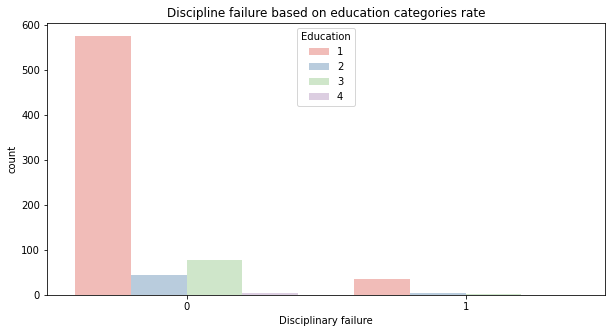

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Disciplinary failure', hue='Education', data=dataset_categorical, palette="Pastel1", )

plt.title("Discipline failure based on education categories rate")



```
Education Categories

1  High School
2  Graduate 
3  Postgraduate 
4  Master and Doctor

```
From the plot, it can show that the high school category has the highest score for undisciplined. Then the ranking is followed by the postgraduate education category.





Text(0.5, 1.0, 'Plot discipline failure rates on the day of the week')

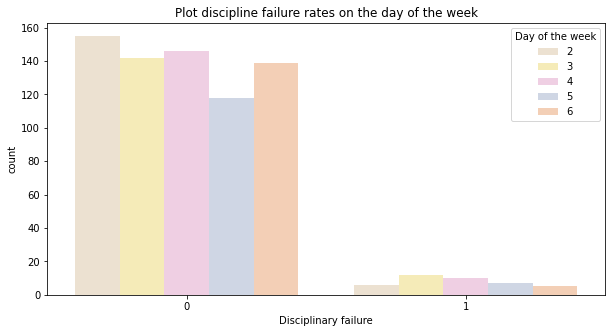

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='Disciplinary failure', hue='Day of the week', data=dataset_categorical, palette="Pastel2_r" )
plt.title("Plot discipline failure rates on the day of the week")



```
Day of the week categories

2  Monday 
3  Tuesday 
4  Wednesday 
5  Thursday 
6  Friday
```
Mostly, the undiscipline numbers come from the day of the week. 

Text(0.5, 1.0, 'Absence categories are base on the social drinker')

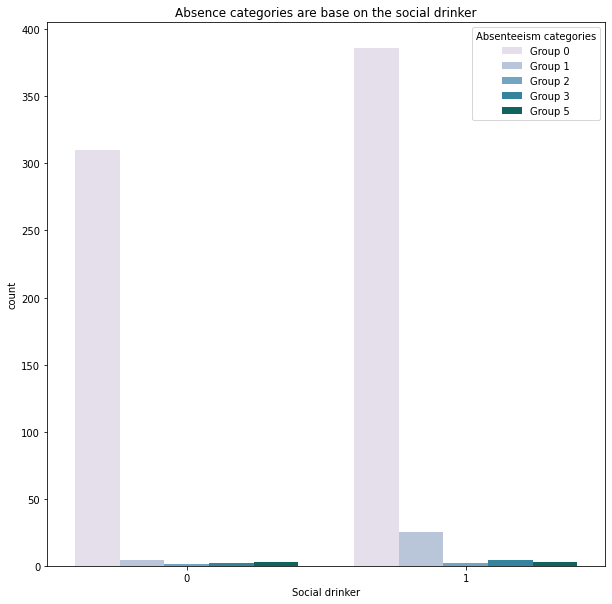

In [34]:
plt.figure(figsize=(10,10))
sns.countplot( x='Social drinker', hue='Absenteeism categories', data=dataset_categorical, palette="PuBuGn" )
plt.title("Absence categories are base on the social drinker")


```
Absenteeism categories

Group 0 		0-20 hours
Group 1 		21-40 hours
Group 2 		41-60 hours
Group 3 		61-80 hours
Group 4 		81-100 hours
Group 5 		101-120 hours
```

Group 0, which has an absence time of 0 to 20 hours, is a group dominated by social drinkers active.





#### Continuous variables

Line graph for a mean of Absenteeism in hours in different months 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean absenteeism in different months')

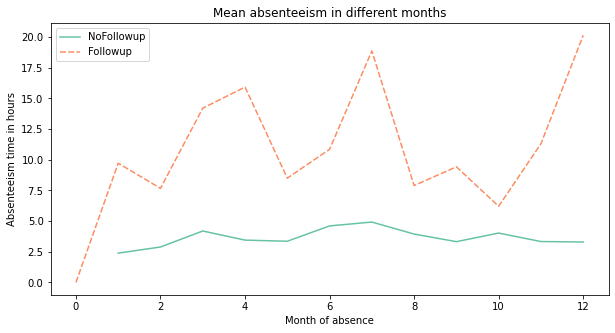

In [35]:
plt.figure(figsize=(10,5))
mean_abs_per_month = data_con.groupby(['Month of absence','followUp_req'],as_index = True).agg({'Absenteeism time in hours': "mean"})

sns.lineplot('Month of absence','Absenteeism time in hours',hue = 'followUp_req',style = 'followUp_req',data = mean_abs_per_month, palette="Set2")

plt.legend(['NoFollowup','Followup'])
plt.title("Mean absenteeism in different months")

followUp_req is the attribute result of the absence reason category aggregation. The unfollowup_req is an attribute without reasons for absence.
From the line plot, that appears that absence is in the category attribute of reasons for absences.

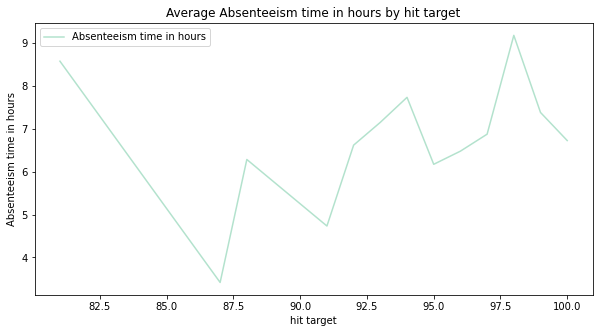

In [36]:
dataset_continuous = data_con

hit = dataset_continuous.groupby('Hit target')[['Absenteeism time in hours']].mean()
ax = hit.plot(kind='line', figsize=(10,5), legend=True,colormap="Pastel2", )
ax.set_xlabel('hit target')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by hit target') 
plt.show()

The average number of absentee numbers fluctuates with the achievement of a company's target. The lowest number of target achievements is the percentage of less than 80.

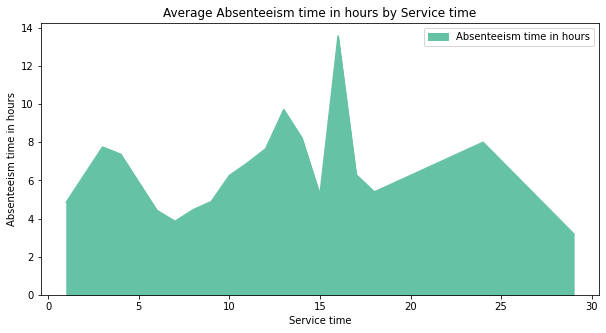

In [37]:
data_ser = dataset_continuous.groupby('Service time')[['Absenteeism time in hours']].mean()
ax = data_ser.plot(kind='area', figsize=(10,5), legend=True, colormap="Set2")
ax.set_xlabel('Service time')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Service time')
plt.show()

Based on this graph, the highest absenteeism is between 15 hours and 20 hours of service time.

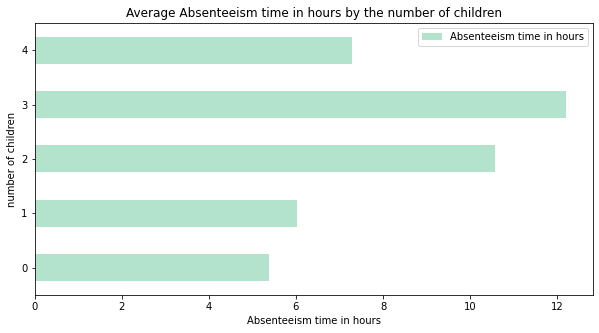

In [38]:
data_son = dataset_continuous.groupby('Son')[['Absenteeism time in hours']].mean()
ax = data_son.plot(kind='barh', figsize=(10,5), legend=True, colormap="Pastel2" )
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('number of children')
ax.set_title('Average Absenteeism time in hours by the number of children')
plt.show()

The highest mean number of absences per hour found among employees with three children.

Aggregate age range

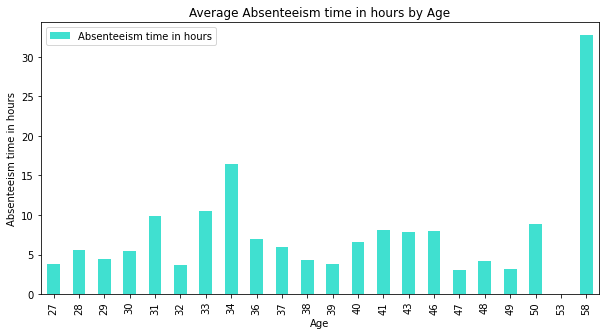

In [39]:
data_age = dataset_continuous.groupby('Age')[['Absenteeism time in hours']].mean()
ax = data_age.plot(kind='bar', figsize=(10,5), legend=True, color="turquoise" )
ax.set_xlabel('Age')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Age')
plt.show()

In [40]:
def group_age(age):
    if age >= 0:
        if age % 10 != 0:
            lower = int(math.floor(age/10.0))*10
            upper = int(math.ceil(age/10.0))*10-1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age+9)
            return f"{lower}-{upper}"
        return np.nan

In [41]:
group_age(20)

'20-29'

In [42]:
dataset_continuous["age_range"] = dataset_continuous["Age"].apply(group_age)

In [43]:
age_order=dataset_continuous['age_range'].unique()
age_order

array(['30-39', '50-59', '20-29', '40-49'], dtype=object)

In [44]:
age_order = ['20-29', '30-39', '40-49', '50-59']

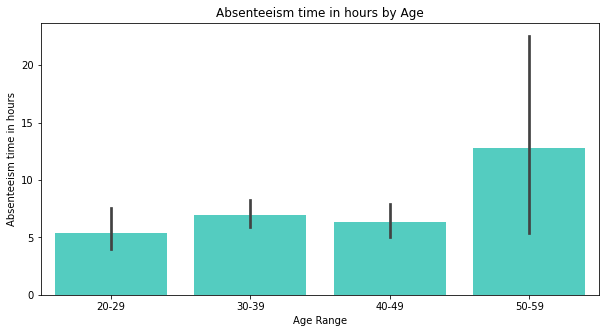

In [45]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age_range',y='Absenteeism time in hours',data=dataset_continuous, order=age_order, color="turquoise")
#plt.title('Average Absenteeism time in hours by Age')
ax.set_xlabel('Age Range')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Absenteeism time in hours by Age')
plt.show()

The 50-59 year age group has the highest number of hours of absenteeism amongst others.